<div style="text-align: center; font-size: 30px; font-weight: bold; padding:20px">University of London: BSc Computer Science (Final Project)</div>
<div style="text-align: center; font-size: 30px; margin-top: 10px;">Using Neural Network based Graph Model for Alzhiemer's Classification</div>
<br>
<div style="text-align: center; font-size: 20px; margin-top: 10px;">Pragya Modi</div>
<div style="text-align: center; font-size: 20px; margin-top: 15px;">190308090</div>

<div style="font-size: 70px; font-weight: bold; border-bottom: 6px solid black; padding-bottom:20px ">2.Graph Model: Beating the Baseline and Over-fitting</div>


<div style="font-size: 30px; padding:10px">
<h1>2.1 Overview</h1>

<p>
This project follows the Universal Workflow of Machine Learning (UWML) as defined in the Deep Learning with Python Book <code>[1]</code>.

In the previous notebook, the first few sections: identifying the problem and preparing the dataset were covered. 

This notebook covers the following steps from the workflow: establishing a baseline, building a model that beats the baseline, and building a model that overfits.
</p>

<div style="font-size: 30px; padding:10px">
<h1>2.2 Establishing Baseline</h1>
</div>

As seen in the earlier notebook, the data is not equally balanced. There are 2319 rows in `no dementia` class and 1695 rows in `dementia category`. From this division, it can be seen that 57.77% of the data falling in the `no dementia ` category. Hence, the random baseline is `57.77%`


<div style="font-size: 30px; padding:10px">
<h1>2.3 Splitting the Data</h1>
</div>

In [1]:
# imports
import tensorflow as tf
from tensorflow.keras import layers, utils
from matplotlib import pyplot as plt
import os, shutil, pathlib
from tensorflow import keras
import numpy as np

import helpers

In [2]:
# load the tensorflow dataset
dataset = tf.data.experimental.load('../data/tfdataset/final_dataset.tfrecords.gz', compression='GZIP')

# print the size of the dataset
dataset_size = 0
for _ in dataset: dataset_size += 1
print(dataset_size)

# define the train, val, and test split ratios
train_size = int(0.6 * dataset_size)
val_size = int(0.15 * dataset_size)

# shuffle the dataset
dataset = dataset.shuffle(buffer_size=dataset_size)

# use the helper function to split the dataset
train_dataset, val_dataset, test_dataset = helpers.split_data(dataset, train_size, val_size)

2022-09-01 04:51:18.610401: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-09-01 04:51:18.610521: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-09-01 04:51:18.630011: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

4014


<div style="font-size: 30px; padding:10px">
<h1>2.4 Model that Beats Baseline</h1>

<p>The baseline model is built with the aim of testing the statistical power of a deep learning model. As outlined earlier, the random baseline for the OASIS3 dataset <code>[2]</code> is 57.77%. The baseline model built gives the highest accuracy of <code>72.43%</code>, which beats the baseline. <p>
</div>

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 images (InputLayer)            [(None, 128, 128, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 126, 126, 32  320         ['images[0][0]']                 
                                )                                                                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 63, 63, 32)   0           ['conv2d[0][0]']                 
                                                                                              

2022-09-01 04:51:20.219505: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


298/301 [============================>.] - ETA: 0s - loss: 0.7386 - accuracy: 0.5680

2022-09-01 04:51:25.790860: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


301/301 [==============================] - 7s 19ms/step - loss: 0.7385 - accuracy: 0.5664 - val_loss: 0.6817 - val_accuracy: 0.5781
Epoch 2/10
301/301 [==============================] - 4s 15ms/step - loss: 0.6654 - accuracy: 0.6125 - val_loss: 0.6685 - val_accuracy: 0.5997
Epoch 3/10
301/301 [==============================] - 5s 18ms/step - loss: 0.6519 - accuracy: 0.6292 - val_loss: 0.6529 - val_accuracy: 0.6346
Epoch 4/10
301/301 [==============================] - 4s 14ms/step - loss: 0.6450 - accuracy: 0.6329 - val_loss: 0.6236 - val_accuracy: 0.6694
Epoch 5/10
301/301 [==============================] - 4s 15ms/step - loss: 0.6376 - accuracy: 0.6416 - val_loss: 0.6556 - val_accuracy: 0.6229
Epoch 6/10
301/301 [==============================] - 4s 14ms/step - loss: 0.6340 - accuracy: 0.6424 - val_loss: 0.6014 - val_accuracy: 0.6860
Epoch 7/10
301/301 [==============================] - 4s 15ms/step - loss: 0.6251 - accuracy: 0.6528 - val_loss: 0.6212 - val_accuracy: 0.6694
Epoch 8/10

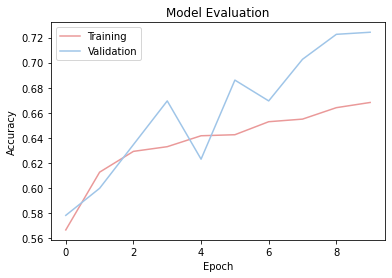

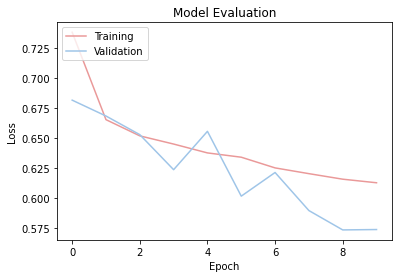

(<keras.callbacks.History at 0x163488fa0>,
 <keras.engine.functional.Functional at 0x164d10dc0>)

In [3]:
image_input = keras.Input(shape=(128, 128, 1), name='images')
feature_input = keras.Input(shape=(7), name='features')

x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(image_input)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.GlobalAveragePooling2D()(x)

y = layers.Dense(64, activation="relu")(feature_input)
y = layers.Dense(32, activation="relu")(y)

z = layers.Concatenate()([x, y])
z = layers.Dense(32, activation="relu")(z)
z = layers.Dense(1, activation="sigmoid")(z)

helpers.run_model(
    [image_input, feature_input],
    z,
    train_dataset,
    val_dataset,
    epochs=10,
)

<div style="font-size: 30px; padding:10px">
<h1>2.5 Building a Model that Overfits</h1>

<p>To build a model that overfits, Chollet <code>[1]</code> suggests using three techniques: increasing number of layers, increasing the number of epochs, and increasing the size of the layers. This model uses all three techniques.
</p>

<p>
From the graph in the cell below, it can be seen that on most points after 20 epochs, the validation accuracy is significantly lower than the train accuracy. This shows that the model overfits.  </p>
</div>

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 images (InputLayer)            [(None, 128, 128, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_2 (Conv2D)              (None, 126, 126, 64  640         ['images[0][0]']                 
                                )                                                                 
                                                                                                  
 max_pooling2d_1 (MaxPooling2D)  (None, 63, 63, 64)  0           ['conv2d_2[0][0]']               
                                                                                            

2022-09-01 04:52:08.377756: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


300/301 [============================>.] - ETA: 0s - loss: 0.8228 - accuracy: 0.5508

2022-09-01 04:52:20.849094: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


301/301 [==============================] - 14s 42ms/step - loss: 0.8226 - accuracy: 0.5498 - val_loss: 0.6849 - val_accuracy: 0.6080
Epoch 2/100
301/301 [==============================] - 12s 41ms/step - loss: 0.6953 - accuracy: 0.5640 - val_loss: 0.6776 - val_accuracy: 0.6196
Epoch 3/100
301/301 [==============================] - 12s 41ms/step - loss: 0.6855 - accuracy: 0.5814 - val_loss: 0.6702 - val_accuracy: 0.6113
Epoch 4/100
301/301 [==============================] - 12s 40ms/step - loss: 0.6737 - accuracy: 0.6030 - val_loss: 0.6360 - val_accuracy: 0.6711
Epoch 5/100
301/301 [==============================] - 12s 41ms/step - loss: 0.6678 - accuracy: 0.6167 - val_loss: 0.6322 - val_accuracy: 0.6794
Epoch 6/100
301/301 [==============================] - 12s 40ms/step - loss: 0.6506 - accuracy: 0.6300 - val_loss: 0.6400 - val_accuracy: 0.6844
Epoch 7/100
301/301 [==============================] - 12s 40ms/step - loss: 0.6423 - accuracy: 0.6424 - val_loss: 0.6551 - val_accuracy: 0.59

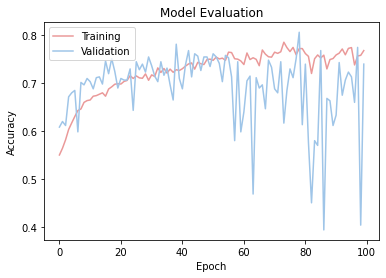

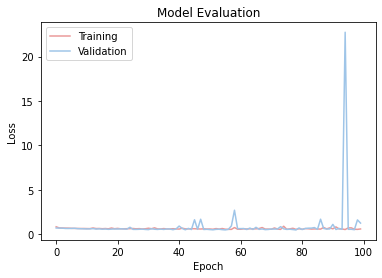

In [4]:
image_input = keras.Input(shape=(128, 128, 1), name='images')
feature_input = keras.Input(shape=(7), name='features')

x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(image_input)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.GlobalAveragePooling2D()(x)

y = layers.Dense(256, activation="relu")(feature_input)
y = layers.Dense(128, activation="relu")(y)
y = layers.Dense(64, activation="relu")(y)

z = layers.Concatenate()([x, y])
z = layers.Dense(256, activation="relu")(z)
z = layers.Dense(128, activation="relu")(z)
z = layers.Dense(64, activation="relu")(z)
z = layers.Dense(1, activation="sigmoid")(z)

history, _ = helpers.run_model(
    [image_input, feature_input],
    z,
    train_dataset,
    val_dataset,
    epochs=100,
)

In [5]:
# get the max accuracy from the history
max(history.history["val_accuracy"])

0.8056478500366211

<div style="font-size: 30px; padding:10px">
<h1>2.6 Model Summary</h1>

<p>
This notebook was aimed at building a model that beats the baseline and another that overfits. These models have been built successfully in this notebook. A summary for both these models is provided below. 
</p>

<table>
<thead>
  <tr>
    <th>Model</th>
    <th>Validation Accuracy</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td>small_model</td>
    <td>72.43%</td>
  </tr>
  <tr>
    <td>overfit_model</td>
    <td>80.56%</td>
  </tr>
</tbody>
</table>

<h1>2.7 References</h1>

<p>[1] Chollet, François. Deep Learning With Python (1st ed.). </p>

<br>

<p>[2] Pamela J. LaMontagne, Tammie LS. Benzinger, John C. Morris, Sarah Keefe, Russ Hornbeck, Chengjie Xiong, Elizabeth Grant, Jason Hassenstab, Krista Moulder, Andrei G. Vlassenko, Marcus E. Raichle, Carlos Cruchaga, and Daniel Marcus. 2019. OASIS-3: Longitudinal Neuroimaging, Clinical, and Cognitive Dataset for Normal Aging and Alzheimer Disease. Radiology and Imaging. DOI:https://doi.org/10.1101/2019.12.13.19014902 </p>


</div>

----
<div style="text-align: center; font-size: 30px; font-weight: bold; padding:20px">End of File</div>

----